# Coding Companion for Diamond Indicator Silicate Mineral Neural Network - Eclogitic Garnet (Annotated)

This notebook contains the code for creating the diamond indicator silicate mineral neural network to predict whether the mineral is associated with rich or poor diamond contents.

We will go through the following in this notebook:

- Exploring and Processing the Data
- Building and Training our Neural Network
- Visualizing Loss and Accuracy
- Adding Regularization to our Neural Network
- Saving and testing the model
- Visualizing the model results

Note that the results you get might differ slightly as there is a degree of randomness in the way the dataset is split as well as the initialization of the neural network.

Under the Home tab for Anaconda Navigator 1.10.0 Launch CMD.exe Prompt to open C:\Windows\system32\cmd.exe prompt. This prompt will show C:\Users\Name but the installation of the packages will be directed to whichever drive in which Anaconda is installed.

For this Coding Companion the following packages were installed:

- pip install keras
- pip install tensorflow
- pip install pydot
- pip install graphviz
- pip install plotly==4.14.3

## Exploring and Processing the Data

We first have to read in the CSV file that we've been given. The following packages are used:
- pandas for importing
- matplotlib.pyplot for creating graphs
- seaborn for graph sizes and palettes
- pydot and graphviz to view the neural network
- VIANN to check neural network feature importance?
- and run a checkon the python version.
This code was created using Python 3.8.8 version.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
import sklearn.metrics

import pydot
import graphviz

from platform import python_version
print('python: %s' % python_version())

python: 3.8.8


In [2]:
# check scikit-learn version as 0.24.1
print('sklearn: %s' % sklearn.__version__)

sklearn: 0.24.1


**Fix random seed for reproducibility**

In [3]:
np.random.seed(333)

**Import and view the data**

In [4]:
#Check working directory
import os
os.getcwd( )

'C:\\Users\\David\\DiamondIndicatorMineral_LAICPMS-ML'

In [5]:
#Change working directory
os.chdir('g:\\R_and_D\\Projects\\MSc_Diamonds\\Python')
os.getcwd( )

'g:\\R_and_D\\Projects\\MSc_Diamonds\\Python'

In [7]:
#Read in csv file
df = pd.read_csv('EG_final.csv')

In [8]:
df

,Sample,Mineral,Pipe,Diamond_High,Craton,Na,Mg,Al,Si,Ca,...,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22
0,Ap22D10,E,BEARTOOTH,yes,Slave,627.600000,56100,74370,191100,28240.0,...,-0.048812,-0.000973,0.000128,0.013831,0.013695,-0.000974,0.010854,0.013285,0.006913,-2.880000e-16
1,Ap22D11,E,BEARTOOTH,yes,Slave,483.200000,37500,71800,185000,31540.0,...,0.056217,-0.028006,0.007387,0.009365,0.015926,0.009772,-0.011876,0.006008,-0.003528,2.080000e-17
2,Ap22D12,E,BEARTOOTH,yes,Slave,552.300000,56930,73130,191600,39440.0,...,-0.013604,0.006744,-0.025079,0.007244,-0.007817,0.029281,-0.002673,0.018093,0.001498,-3.400000e-16
3,Ap22D13,E,BEARTOOTH,yes,Slave,298.638752,42460,75420,189500,59860.0,...,0.064989,-0.015433,-0.021896,0.003115,-0.006966,-0.022694,-0.012266,0.012161,0.008531,-5.550000e-17
4,Ap22D14,E,BEARTOOTH,yes,Slave,989.300000,37050,70950,184400,40090.0,...,0.017003,-0.044568,0.027924,-0.046773,-0.036418,-0.000722,0.004347,0.007048,-0.005155,-3.600000e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,Ap27H15,E,ZERO,no,Kaapvaal,686.300000,70370,68080,190200,31830.0,...,-0.008978,-0.016852,0.024310,-0.030730,0.025107,-0.014115,0.001964,-0.004483,0.002063,3.630000e-16
112,Ap27H16,E,ZERO,no,Kaapvaal,267.825124,67810,70000,188100,31630.0,...,0.022726,-0.028011,-0.036988,0.001999,-0.003229,-0.009654,0.002188,-0.011002,0.009190,-3.750000e-16
113,Ap27H17,E,ZERO,no,Kaapvaal,251.308984,70930,63170,187300,27520.0,...,-0.017605,0.006996,-0.051253,0.044523,0.006459,-0.020203,-0.029038,-0.004417,0.001434,-2.640000e-16
114,Ap27H18,E,ZERO,no,Kaapvaal,241.182865,65210,68010,192300,30530.0,...,-0.019594,-0.045257,-0.024464,0.005723,0.004257,0.005905,0.008298,-0.003613,-0.002013,-3.220000e-16


**The dataset that we have now is in what we call a pandas dataframe. To convert it to an array, simply access its values:**

In [9]:
dataset = df.values

In [10]:
dataset

array([['    Ap22D10', 'E', 'BEARTOOTH', ..., 0.013285125, 0.006913475,
        -2.88e-16],
       ['    Ap22D11', 'E', 'BEARTOOTH', ..., 0.006007577, -0.003527826,
        2.08e-17],
       ['    Ap22D12', 'E', 'BEARTOOTH', ..., 0.01809332, 0.001497677,
        -3.4e-16],
       ...,
       ['    Ap27H17', 'E', 'ZERO', ..., -0.004417434, 0.001433868,
        -2.64e-16],
       ['    Ap27H18', 'E', 'ZERO', ..., -0.003612851, -0.002013209,
        -3.22e-16],
       ['    Ap27K06', 'E', 'ZERO', ..., -0.008059876, -0.000836777,
        6.49e-16]], dtype=object)

### Visualize the data by Diamond Contents based on previously run RQ-PCA

In [11]:
#Set plot style
import matplotlib.style as style

style.use('seaborn-paper') #sets the style as paper (smaller), poster (larger), talk (presentation)

colors = ("#0f2080", "#f5793a", "#85c0f9", "#a95aa1") #defines colours to use as suitable for colorblindness
sns.set_palette(sns.color_palette(colors)) #sets colour palette

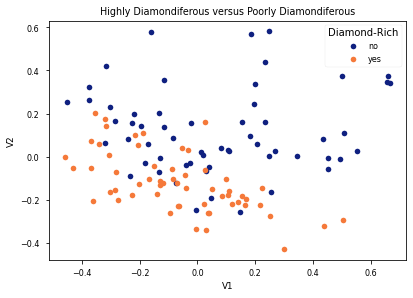

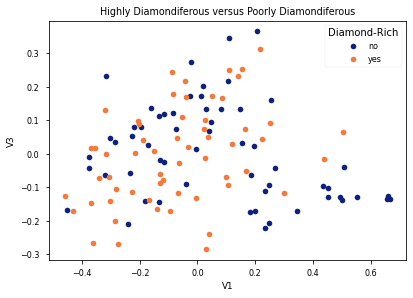

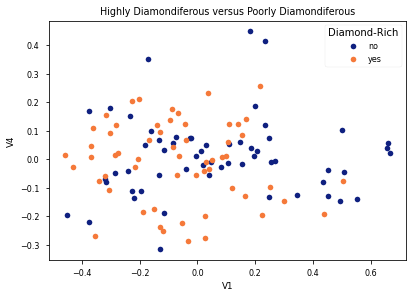

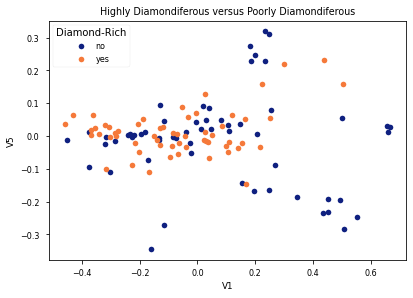

In [12]:
df.set_index(['Diamond_High', 'V1']).unstack('Diamond_High')['V2'].plot(style='o')
plt.ylabel('V2')
plt.title('Eclogitic Garnet Associations by Diamond Contents')
plt.legend(title="Diamond-Rich")

df.set_index(['Diamond_High', 'V1']).unstack('Diamond_High')['V3'].plot(style='o')
plt.ylabel('V3')
plt.title('Eclogitic Garnet Associations by Diamond Content')
plt.legend(title="Diamond-Rich")

df.set_index(['Diamond_High', 'V1']).unstack('Diamond_High')['V4'].plot(style='o')
plt.ylabel('V4')
plt.title('Eclogitic Garnet Associations by Diamond Content')
plt.legend(title="Diamond-Rich")

df.set_index(['Diamond_High', 'V1']).unstack('Diamond_High')['V5'].plot(style='o')
plt.ylabel('V5')
plt.title('Eclogitic Garnet Associations by Diamond Content')
plt.legend(title="Diamond-Rich")

### Visualize the RQ-PCA Eclogitic Garnet Associations by Pipe

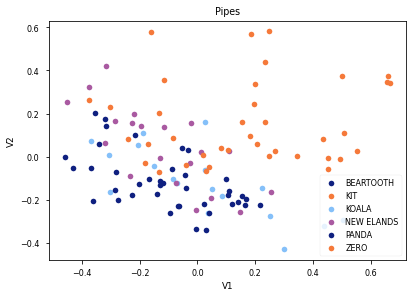

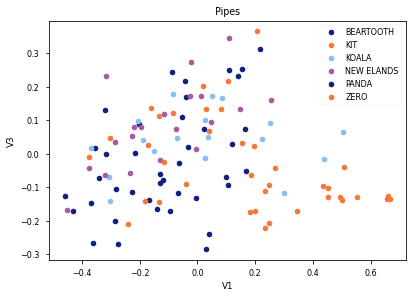

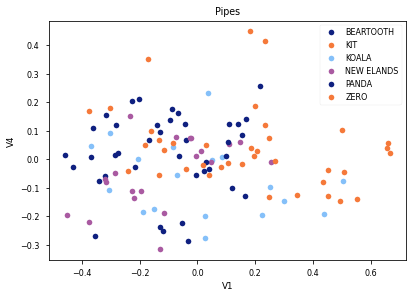

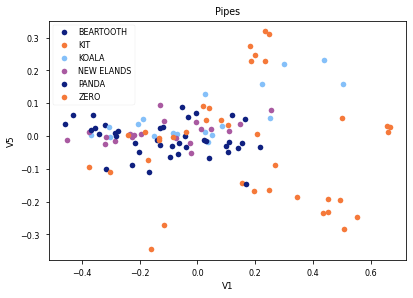

In [13]:
df.set_index(['Pipe', 'V1']).unstack('Pipe')['V2'].plot(style='o')
plt.ylabel('V2')
plt.title('Eclogitic Garnet Associations by Pipe')
plt.legend(title="")

df.set_index(['Pipe', 'V1']).unstack('Pipe')['V3'].plot(style='o')
plt.ylabel('V3')
plt.title('Eclogitic Garnet Associations by Pipe')
plt.legend(title="")

df.set_index(['Pipe', 'V1']).unstack('Pipe')['V4'].plot(style='o')
plt.ylabel('V4')
plt.title('Eclogitic Garnet Associations by Pipe')
plt.legend(title="")

df.set_index(['Pipe', 'V1']).unstack('Pipe')['V5'].plot(style='o')
plt.ylabel('V5')
plt.title('Eclogitic Garnet Associations by Pipe')
plt.legend(title="")

### Visualize the Eclogitic Garnet RQ-PCA Associations by Craton

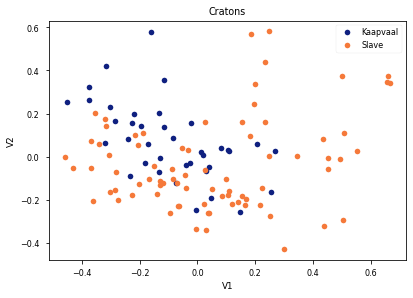

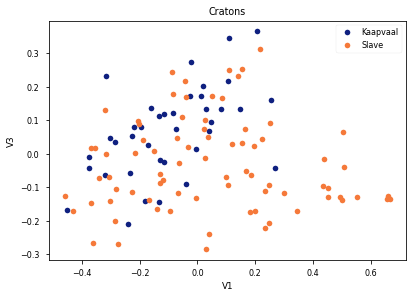

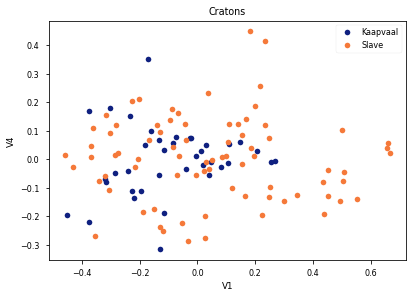

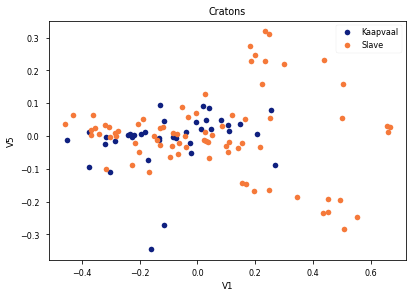

In [14]:
df.set_index(['Craton', 'V1']).unstack('Craton')['V2'].plot(style='o')
plt.ylabel('V2')
plt.title('Eclogitic Garnet Associations by Craton')
plt.legend(title="")

df.set_index(['Craton', 'V1']).unstack('Craton')['V3'].plot(style='o')
plt.ylabel('V3')
plt.title('Eclogitic Garnet Associations by Craton')
plt.legend(title="")

df.set_index(['Craton', 'V1']).unstack('Craton')['V4'].plot(style='o')
plt.ylabel('V4')
plt.title('Eclogitic Garnet Associations by Craton')
plt.legend(title="")

df.set_index(['Craton', 'V1']).unstack('Craton')['V5'].plot(style='o')
plt.ylabel('V5')
plt.title('Eclogitic Garnet Associations by Craton')
plt.legend(title="")

### Normalizing the Data

**Normalizing our data is very important, as we want the input features to be on the same order of magnitude to make our training easier. We can use a min-max scaler from scikit-learn which scales our data to be between 0 and 1, but geochemical data is compositional. Compositional data consist of ratios that are not free to vary independently. This interdependence of geochemical data can result in an incorrect assessment of correlations, or other measures of associations, commonly used in multivariate statistics if the data isn't first transformed. Z-score transformation is not appropriate for multi-variate statistical analysis of geochemical data because z-score transformation assumes the data has a normal distribution. Most geochemical data has a left-skewed distribution. The substitution or removal of an element from multielement studies using raw or z-score normalized data would result in different interpretations, since the variable are not free to vary independently, and that research would not be suitable for a comparison with other research.**

**For this study the element concentrations were scaled using centred log-ratio method in R.**

### Splitting the Data

**Now, we split the dataset into our input features and the output feature we wish to predict because "y" needs to be one dimensional in order to split into train, test and validate groups. Using lowercase "y" shows that this is the unknown parameter.**

In [16]:
X = df[df.columns[27:49]]
y = df[['Diamond_High']]
print(y)
print(X)

    Diamond_High
0            yes
1            yes
2            yes
3            yes
4            yes
..           ...
111           no
112           no
113           no
114           no
115           no

[116 rows x 1 columns]
       Na_clr    Mg_clr    Al_clr     Si_clr    Ca_clr    Sc_clr    Ti_clr  \
0    3.568510  8.061498  8.343414   9.287159  7.375101  0.440065  4.246242   
1    3.293979  7.645644  8.295188   9.241659  7.472560  0.721760  4.290567   
2    3.839299  8.474785  8.725201   9.688373  8.107743  1.039733  4.717389   
3    2.863625  7.820708  8.395218   9.316535  8.164154  0.927217  4.332200   
4    3.959154  7.582180  8.231887   9.187019  7.661038  0.638427  4.668046   
..        ...       ...       ...        ...       ...       ...       ...   
111  3.108866  7.739074  7.705990   8.733383  6.945716  0.944211  3.242726   
112  2.995669  8.529800  8.561585   9.550064  7.767196  1.796569  4.015358   
113  2.636879  8.279644  8.163780   9.250662  7.332864  1.543509  3.46

In [17]:
y_dm = pd.get_dummies(y['Diamond_High'], prefix = 'diamond')
y_dm

,diamond_no,diamond_yes
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
111,1,0
112,1,0
113,1,0
114,1,0


### Stratified Shuffle Split is used to ensure the same percentage of samples for each class occurs in each split

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit

In [19]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=333)
sss.get_n_splits(X, y['Diamond_High'])

1

In [20]:
print(sss)

StratifiedShuffleSplit(n_splits=1, random_state=333, test_size=0.5,
            train_size=None)


In [21]:
#first split to create the training set and the test-validation dataset
for train_index, test_index in sss.split(X, y):
     print("TRAIN:", train_index, "TEST:", test_index)
     X_train, X_testval = X.iloc[train_index], X.iloc[test_index]
     y_train, y_testval = y.iloc[train_index], y.iloc[test_index]

TRAIN: [ 62  56  72   2 113  59  18  53 100  32  21  79  43   6 112  80  75  89
  54  33   0  47  64  60  44  38  58  30  99  73 115  68  63  97  55  31
  14  94  24  17  82  42  74  13  76  23  85  28 111  91  40  69  48  88
 101  29  37   5] TEST: [ 26 103  90  19  86  15  96  98  39  35  78  41   3   9   7  70  16 109
   4  36  50   1  93  57  49 102  92  34  22   8 114 107  84  95  77  52
  67  25  61  45  10 104  20 106  66 108  83  11  51  71  87 105  27  81
 110  46  65  12]


In [22]:
#second split for creating the test and validation datasets
for train_index, test_index in sss.split(X_testval, y_testval):
     print("TEST:", train_index, "VAL:", test_index)
     X_test, X_val = X_testval.iloc[train_index], X_testval.iloc[test_index]
     y_test, y_val = y_testval.iloc[train_index], y_testval.iloc[test_index]

TEST: [42 39  1 40 12 23  4 20 29  2 45 57 38 16 19 52 44 41  7 15 53  9 34 55
 28 26 30 49 47] VAL: [17 37 18 22 43 14  5  0 46 10  8 27 32 51  3 35 13 56 11 48 31 24 21 25
 33 54 36  6 50]


In [23]:
y_train.head(5)

,Diamond_High
62,no
56,yes
72,no
2,yes
113,no


In [24]:
X_train.head(5)

,Na_clr,Mg_clr,Al_clr,Si_clr,Ca_clr,Sc_clr,Ti_clr,Mn_clr,Sr_clr,Y_clr,...,Nd_clr,Eu_clr,Gd_clr,Tb_clr,Dy_clr,Ho_clr,Er_clr,Yb_clr,Lu_clr,Ta_clr
62,2.573494,7.446205,7.985973,8.986173,7.877644,0.887044,3.305657,4.666753,0.204905,-2.129035,...,-2.716822,-3.423392,-1.886816,-3.320738,-1.467876,-2.771630,-1.922322,-1.751106,-3.522765,-8.418463
56,3.712454,7.285341,7.792426,8.752306,7.845923,0.781572,4.650940,4.189808,-0.634774,-1.299429,...,-3.133260,-4.347704,-3.240358,-4.727194,-2.504651,-3.842155,-2.717432,-2.447956,-4.374372,-6.039380
72,3.456842,8.653091,8.844435,9.836221,1.503258,4.628216,1.990932,5.121911,-0.229632,-0.186356,...,-2.600859,-3.376245,-2.500776,-3.935860,-2.018938,-3.497605,-2.377716,-2.420733,-4.366643,-6.931593
2,3.839299,8.474785,8.725201,9.688373,8.107743,1.039733,4.717389,4.451784,-3.645976,-0.881484,...,-2.817283,-4.515013,-3.090979,-4.595056,-2.890308,-4.246749,-3.188143,-3.342293,-5.288203,-5.981351
113,2.636879,8.279644,8.163780,9.250662,7.332864,1.543509,3.462128,5.046141,-3.911456,-0.325625,...,-3.367840,-4.093777,-2.296478,-3.998467,-2.022704,-3.710785,-2.567721,-2.407378,-3.884057,-8.637125


In [25]:
y_test.head(5)

,Diamond_High
20,yes
45,yes
103,no
10,yes
3,yes


In [26]:
X_test.head(5)

,Na_clr,Mg_clr,Al_clr,Si_clr,Ca_clr,Sc_clr,Ti_clr,Mn_clr,Sr_clr,Y_clr,...,Nd_clr,Eu_clr,Gd_clr,Tb_clr,Dy_clr,Ho_clr,Er_clr,Yb_clr,Lu_clr,Ta_clr
20,2.987337,7.836144,8.350412,9.360468,7.564681,0.367011,4.852001,4.283706,-3.898226,-0.232336,...,-3.482711,-4.450295,-3.283860,-4.622145,-2.207348,-3.482711,-2.357781,-2.052400,-3.960747,-6.701587
45,2.762111,6.676870,7.224950,8.139179,6.976534,0.163753,3.754397,3.877610,-0.094745,-0.434331,...,-3.034840,-4.121756,-2.538233,-3.941374,-1.921951,-3.355748,-2.291969,-2.184186,-4.110195,-6.011154
103,4.953507,7.951012,7.976612,9.055139,7.285973,1.931952,3.301046,4.943127,-0.707635,-0.827740,...,-3.840350,-5.292603,-4.224762,-5.125549,-2.700065,-4.106979,-2.830686,-2.315220,-3.929298,-8.205232
10,4.180842,8.302575,8.798142,9.720833,8.822607,0.012604,4.542149,3.988523,-2.595240,-1.141505,...,-2.189775,-3.717383,-2.786908,-4.276999,-2.630747,-4.341538,-3.553080,-3.871534,-5.950975,-5.440150
3,2.863625,7.820708,8.395218,9.316535,8.164154,0.927217,4.332200,4.119983,-1.767456,-1.100420,...,-2.687189,-4.144943,-3.178100,-4.875830,-2.866069,-4.550408,-3.281896,-3.329906,-4.955873,-6.054485


In [27]:
y_val.head(5)

,Diamond_High
109,no
25,yes
4,yes
93,no
106,no


In [28]:
X_val.head(5)

,Na_clr,Mg_clr,Al_clr,Si_clr,Ca_clr,Sc_clr,Ti_clr,Mn_clr,Sr_clr,Y_clr,...,Nd_clr,Eu_clr,Gd_clr,Tb_clr,Dy_clr,Ho_clr,Er_clr,Yb_clr,Lu_clr,Ta_clr
109,2.274170,7.953645,7.896628,8.882147,7.104743,1.171477,3.398866,4.518214,-1.471593,-0.567965,...,-3.156668,-3.963144,-2.607309,-4.137498,-2.699018,-3.375358,-2.591964,-2.781417,-4.656291,-8.127328
25,3.155656,6.792351,7.728522,8.689833,6.902087,0.502686,1.954843,4.577170,-5.220288,0.864700,...,-3.170494,-3.619187,-1.753894,-3.162831,-1.095871,-2.443317,-1.272989,-0.971561,-2.770170,-9.189917
4,3.959154,7.582180,8.231887,9.187019,7.661038,0.638427,4.668046,4.501715,-3.854135,0.369409,...,-3.959495,-4.451972,-3.482571,-4.077278,-1.725903,-2.958047,-1.790441,-1.693689,-3.630991,-7.543014
93,5.281962,8.589268,8.500139,9.497085,7.285629,1.036535,4.364274,4.954873,-3.257831,-0.512393,...,-3.849196,-4.064307,-3.006517,-4.392811,-2.407986,-3.915887,-2.573653,-2.355929,-4.287451,-9.036028
106,5.406928,8.407291,8.451694,9.526350,7.619120,1.057154,3.743903,4.910194,-0.791487,-1.331609,...,-3.416471,-4.472523,-3.811125,-5.299202,-3.202061,-4.537062,-3.661593,-3.274820,-5.047887,-7.245112


**Next encode the categorical variablesfor diamond content, yes and no, using one hot vector multilabel. The data is split first then one hot encoded since the split function cannot handle more than one Y column.**

In [29]:
y_traindm = pd.get_dummies(y_train['Diamond_High'], prefix = 'diamond')
y_traindm.head(5)

,diamond_no,diamond_yes
62,1,0
56,0,1
72,1,0
2,0,1
113,1,0


In [30]:
y_testdm = pd.get_dummies(y_test['Diamond_High'], prefix = 'diamond')
y_testdm.head(5)

,diamond_no,diamond_yes
20,0,1
45,0,1
103,1,0
10,0,1
3,0,1


In [31]:
y_valdm = pd.get_dummies(y_val['Diamond_High'], prefix = 'diamond')
y_valdm.head(5)

,diamond_no,diamond_yes
109,1,0
25,0,1
4,0,1
93,1,0
106,1,0


In [32]:
# Show the rows and columns count for each split
print(X_train.shape, X_val.shape, X_test.shape)
print(y_traindm.shape, y_valdm.shape, y_testdm.shape)

(58, 22) (29, 22) (29, 22)
(58, 2) (29, 2) (29, 2)


# Building and Training the Neural Network

**Keras is used to build our architecture and will need to be imported.**

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import model_from_json

## A Sequential model will be used, meaning that the layers are described in order. This neural network has two layers:

- Hidden layer 1: 10 neurons, ReLU activation (rectified linear activation for a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. Useful for developing multilayer Perceptron and convolutional neural networks.)
- Hidden layer 2: 5 neurons, ReLU activation
- Output Layer: 2 neurons, Softmax activation (allows for classification)
- Input Shape: 22 variables (centred log-ratio element concentrations)

In [34]:
model = Sequential([
    Dense(10, activation='relu', input_shape=(22,)),
    Dense(5, activation='relu'),
    Dense(2, activation='softmax'),
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                230       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 12        
Total params: 297
Trainable params: 297
Non-trainable params: 0
_________________________________________________________________
None


## Setup Visualization of the Neural Network

In [35]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard

In [36]:
from datetime import datetime
from packaging import version

import tensorflow as tf
from tensorflow import keras

print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >= 2, \
    "This notebook requires TensorFlow 2.0 or above."

TensorFlow version:  2.4.0


In [37]:
import tensorboard
tensorboard.__version__

'2.4.0'

In [38]:
# Define the Keras TensorBoard callback prior to training.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# Determine the Importance of the Features
We measure the importance of a feature by calculating the increase in the model's prediction error after permuting the feature. A feature is "important" if shuffling its values increases the model error, because in this case the model relied on the feature for the prediction. A feature is "unimportant" if shuffling its values leaves the model error unchanged, because in this case the model ignored the feature for the prediction. The permutation feature importance measurement was introduced by Breiman (2001) for random forests. Based on this idea, Fisher, Rudin, and Dominici (2018) proposed a model-agnostic version of the feature importance and called it model reliance. They also introduced more advanced ideas about feature importance, for example a (model-specific) version that takes into account that many prediction models may predict the data well. Rebelo de Sá (2019) developed code to measure the variance of the weights calculated during the training phase to get the relative importance of the features in the neural network.

In [39]:
#Setting up feature importance tracking
#Rebelo de Sá, C. (2019). Variance-based feature importance in neural networks.
#22st International Conference on Discovery Science (DS 2019) Split, Croatia, October 28-30, 2019


class VarImpVIANN(keras.callbacks.Callback):
    def __init__(self, verbose=0):
        self.verbose = verbose
        self.n = 0
        self.M2 = 0.0

    def on_train_begin(self, logs={}, verbose = 1):
        if self.verbose:
            print("VIANN version 1.0 (Wellford + Mean) update per epoch")
        self.diff = self.model.layers[0].get_weights()[0]
        
    def on_epoch_end(self, batch, logs={}):
        currentWeights = self.model.layers[0].get_weights()[0]
        
        self.n += 1
        delta = np.subtract(currentWeights, self.diff)
        self.diff += delta/self.n
        delta2 = np.subtract(currentWeights, self.diff)
        self.M2 += delta*delta2
            
        self.lastweights = self.model.layers[0].get_weights()[0]

    def on_train_end(self, batch, logs={}):
        if self.n < 2:
            self.s2 = float('nan')
        else:
            self.s2 = self.M2 / (self.n - 1)
        
        scores = np.sum(np.multiply(self.s2, np.abs(self.lastweights)), axis = 1)
        
        self.varScores = (scores - min(scores)) / (max(scores) - min(scores))
        if self.verbose:
            print("Most important variables: ",
                  np.array(self.varScores).argsort()[-10:][::-1])

VIANN = VarImpVIANN(verbose=1)

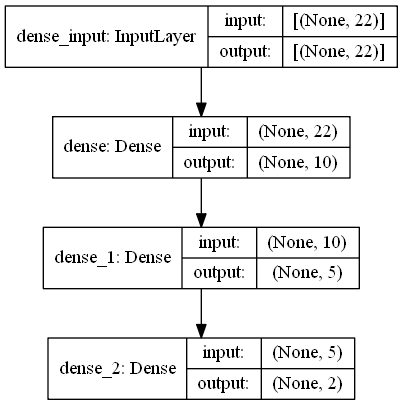

In [40]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot_EG_template.png', show_shapes=True, show_layer_names=True)

**Now that we've got our architecture specified, we need to find the best numbers for it. Before we start our training, we have to configure the model by:**
- Telling it what algorithm you want to use to do the optimization (we'll use stochastic gradient descent, **sgd**)
- Telling it what loss function to use (for binary classification, we will use **binary cross entropy**)
- Telling it what other metrics you want to track apart from the loss function (we want to track **accuracy** as well)

In [41]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

##### **Training on the data is pretty straightforward and requires one line of code. The function is called 'fit' as we are fitting the parameters to the data.**

**We specify:**
- What data we are training on, which is X_train and y_train
- The size of our mini-batch (since we only have 58 training samples we won't split into mini-batches)
- How long we want to train it for (epochs)
- What our validation data is so that the model will tell us how we are doing on the validation data at each point.

**This function will output a history, which we save under the variable hist to be used later.**

In [42]:
hist = model.fit(X_train, y_traindm,
          batch_size=58, epochs=100,
          validation_data=(X_val, y_valdm), callbacks = [VIANN])

VIANN version 1.0 (Wellford + Mean) update per epoch
Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.8808 - accuracy: 0.5000 - val_loss: 0.8171 - val_accuracy: 0.5172
Epoch 2/100
1/1 [==============================] - 0s 34ms/step - loss: 0.8272 - accuracy: 0.5000 - val_loss: 0.7810 - val_accuracy: 0.5172
Epoch 3/100
1/1 [==============================] - 0s 32ms/step - loss: 0.7883 - accuracy: 0.5000 - val_loss: 0.7562 - val_accuracy: 0.5172
Epoch 4/100
1/1 [==============================] - 0s 32ms/step - loss: 0.7607 - accuracy: 0.5000 - val_loss: 0.7394 - val_accuracy: 0.5172
Epoch 5/100
1/1 [==============================] - 0s 32ms/step - loss: 0.7414 - accuracy: 0.5000 - val_loss: 0.7281 - val_accuracy: 0.5172
Epoch 6/100
1/1 [==============================] - 0s 32ms/step - loss: 0.7280 - accuracy: 0.5000 - val_loss: 0.7208 - val_accuracy: 0.5172
Epoch 7/100
1/1 [==============================] - 0s 32ms/step - loss: 0.7183 - accuracy: 0.5000 - val_loss:

Epoch 59/100
1/1 [==============================] - 0s 31ms/step - loss: 0.6580 - accuracy: 0.5345 - val_loss: 0.7054 - val_accuracy: 0.3793
Epoch 60/100
1/1 [==============================] - 0s 30ms/step - loss: 0.6577 - accuracy: 0.5345 - val_loss: 0.7053 - val_accuracy: 0.4138
Epoch 61/100
1/1 [==============================] - 0s 32ms/step - loss: 0.6574 - accuracy: 0.5345 - val_loss: 0.7058 - val_accuracy: 0.3793
Epoch 62/100
1/1 [==============================] - 0s 32ms/step - loss: 0.6571 - accuracy: 0.5345 - val_loss: 0.7055 - val_accuracy: 0.3793
Epoch 63/100
1/1 [==============================] - 0s 31ms/step - loss: 0.6568 - accuracy: 0.5345 - val_loss: 0.7060 - val_accuracy: 0.3793
Epoch 64/100
1/1 [==============================] - 0s 31ms/step - loss: 0.6565 - accuracy: 0.5345 - val_loss: 0.7058 - val_accuracy: 0.3793
Epoch 65/100
1/1 [==============================] - 0s 31ms/step - loss: 0.6563 - accuracy: 0.5345 - val_loss: 0.7062 - val_accuracy: 0.3793
Epoch 66/100


# Visualizing Loss and Accuracy

**Visualize the training loss and the validation loss using matplotlib as plt. Note the separation between the training and validation data.**

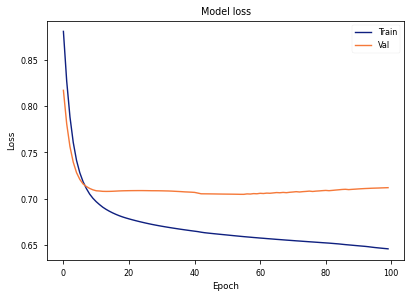

In [43]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

**Then visualize the training accuracy and the validation accuracy. Note the separation between the validation and training accuracy indicating underfitting and the need for a larger network, more hidden layers, longer train time or more advanced algorithms.**

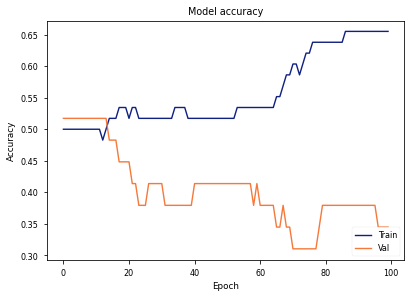

In [44]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [45]:
#Visualize Feature Importance in table format
X_columns = X_train.columns.tolist()
model_FI_scores = VIANN.varScores.tolist()

model_FI = pd.DataFrame()
model_FI['Variable'] = X_columns
model_FI['Scores'] = model_FI_scores
model_FI.sort_values(by=['Scores'], inplace=True, ascending=True)

model_FI

,Variable,Scores
18,Er_clr,0.000000
16,Dy_clr,0.002329
14,Gd_clr,0.005752
19,Yb_clr,0.015770
9,Y_clr,0.042613
12,Nd_clr,0.073839
13,Eu_clr,0.080993
15,Tb_clr,0.100129
20,Lu_clr,0.103194
5,Sc_clr,0.106909


In [113]:
#Link Features to VIANN scores and export to csv
model_FI_array = np.vstack((X_train.columns, VIANN.varScores))
pd.DataFrame(model_FI_array).to_csv("EG_model_FI.csv", index=None)
model_FI_array

array([['Na_clr', 'Mg_clr', 'Al_clr', 'Si_clr', 'Ca_clr', 'Sc_clr',
        'Ti_clr', 'Mn_clr', 'Sr_clr', 'Y_clr', 'Zr_clr', 'Ba_clr',
        'Nd_clr', 'Eu_clr', 'Gd_clr', 'Tb_clr', 'Dy_clr', 'Ho_clr',
        'Er_clr', 'Yb_clr', 'Lu_clr', 'Ta_clr'],
       [0.16309648752212524, 0.13597372174263, 0.13153299689292908, 0.0,
        0.07182417064905167, 1.0, 0.2822116017341614,
        0.23275749385356903, 0.23194381594657898, 0.6549647450447083,
        0.1979304850101471, 0.1305156946182251, 0.1285167634487152,
        0.2056443691253662, 0.04514913633465767, 0.052157338708639145,
        0.012361330911517143, 0.10226452350616455, 0.029085934162139893,
        0.01761600188910961, 0.20542359352111816, 0.14103828370571136]],
      dtype=object)

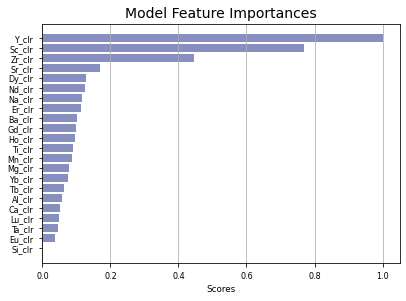

In [112]:
# Plot the feature importances of the model
fig, ax = plt.subplots()

ax.barh(model_FI['Variable'], model_FI['Scores'], align="center", alpha=0.5)
ax.set_xlabel('Scores')
ax.set_yticks(model_FI['Variable'])
ax.xaxis.grid(True)
ax.set_title("Model Feature Importances", fontsize='14')

# Save the figure and show
plt.savefig('EG_model_FI_barplot.png')
plt.show()

**Visualize the neural network.**

In [48]:
#View tensorboard graphic of the neural network structure
#Re-run this cell if there is a timeout error
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 11316), started 1:06:33 ago. (Use '!kill 11316' to kill it.)

**Check model's performance on test data.**

In [49]:
model.evaluate(X_test, y_testdm)[1]

1/1 [==============================] - 0s 12ms/step - loss: 0.6331 - accuracy: 0.6552


0.6551724076271057

**Out dataset is small and the accuracy is low, therefore try adding in regularization and drop out.**

# Adding Regularization to the Neural Network

**Train a model which will overfit, which we call Model 2. Input shape is how many variables (22) and Dense is number of y values (2).**

In [50]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(22,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(2, activation='softmax'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, y_traindm,
          batch_size=58, epochs=200,
          validation_data=(X_val, y_valdm))

Epoch 1/200
1/1 [==============================] - 1s 576ms/step - loss: 0.6883 - accuracy: 0.5000 - val_loss: 2.0649 - val_accuracy: 0.4828
Epoch 2/200
1/1 [==============================] - 0s 55ms/step - loss: 1.8789 - accuracy: 0.5345 - val_loss: 0.9170 - val_accuracy: 0.5517
Epoch 3/200
1/1 [==============================] - 0s 48ms/step - loss: 0.6935 - accuracy: 0.6897 - val_loss: 1.0402 - val_accuracy: 0.5172
Epoch 4/200
1/1 [==============================] - 0s 53ms/step - loss: 1.0250 - accuracy: 0.5000 - val_loss: 0.6937 - val_accuracy: 0.5172
Epoch 5/200
1/1 [==============================] - 0s 48ms/step - loss: 0.5990 - accuracy: 0.6207 - val_loss: 0.7919 - val_accuracy: 0.5517
Epoch 6/200
1/1 [==============================] - 0s 49ms/step - loss: 0.6086 - accuracy: 0.6897 - val_loss: 0.7891 - val_accuracy: 0.5517
Epoch 7/200
1/1 [==============================] - 0s 50ms/step - loss: 0.5988 - accuracy: 0.7241 - val_loss: 0.6835 - val_accuracy: 0.5172
Epoch 8/200
1/1 [==

1/1 [==============================] - 0s 48ms/step - loss: 3.3675e-04 - accuracy: 1.0000 - val_loss: 0.6126 - val_accuracy: 0.9310
Epoch 117/200
1/1 [==============================] - 0s 48ms/step - loss: 3.2638e-04 - accuracy: 1.0000 - val_loss: 0.6150 - val_accuracy: 0.9310
Epoch 118/200
1/1 [==============================] - 0s 48ms/step - loss: 3.1707e-04 - accuracy: 1.0000 - val_loss: 0.6173 - val_accuracy: 0.9310
Epoch 119/200
1/1 [==============================] - 0s 52ms/step - loss: 3.0877e-04 - accuracy: 1.0000 - val_loss: 0.6192 - val_accuracy: 0.9310
Epoch 120/200
1/1 [==============================] - 0s 48ms/step - loss: 3.0042e-04 - accuracy: 1.0000 - val_loss: 0.6205 - val_accuracy: 0.9310
Epoch 121/200
1/1 [==============================] - 0s 47ms/step - loss: 2.9121e-04 - accuracy: 1.0000 - val_loss: 0.6212 - val_accuracy: 0.9310
Epoch 122/200
1/1 [==============================] - 0s 48ms/step - loss: 2.8149e-04 - accuracy: 1.0000 - val_loss: 0.6217 - val_accuracy:

## Visualize to see what overfitting looks like in terms of the loss and accuracy.

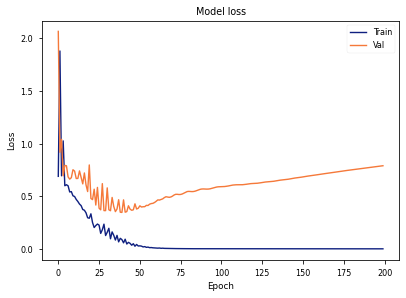

In [51]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

**Overfitting is represented by an increase in loss in the validation set after the 20th epoch.**

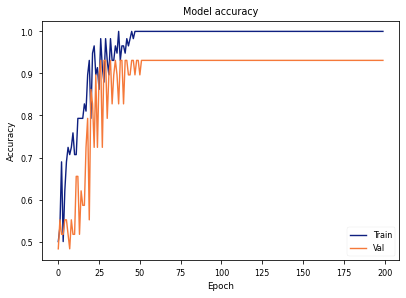

In [52]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

**Test Accuracy**

In [53]:
model_2.evaluate(X_test, y_testdm)[1]

1/1 [==============================] - 0s 14ms/step - loss: 0.3306 - accuracy: 0.9655


0.9655172228813171

## Incorporate Regularization and Dropout into the Third Model

**To address the overfitting we see in Model 2, we'll incorporate L2 regularization and dropout in our third model here (Model 3). Input shape is how many variables (22) and Dense is number of y values (2).**

In [54]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [65]:
VIANN = VarImpVIANN(verbose=1)
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(22,)),
    Dropout(0.2),
    Dense(750, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(500, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(250, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(2, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [66]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, y_traindm,
          batch_size=58, epochs=200,
          validation_data=(X_val, y_valdm), callbacks = [VIANN])

VIANN version 1.0 (Wellford + Mean) update per epoch
Epoch 1/200
1/1 [==============================] - 1s 781ms/step - loss: 19.1052 - accuracy: 0.5000 - val_loss: 18.4247 - val_accuracy: 0.5172
Epoch 2/200
1/1 [==============================] - 0s 43ms/step - loss: 18.4171 - accuracy: 0.5690 - val_loss: 17.9472 - val_accuracy: 0.4828
Epoch 3/200
1/1 [==============================] - 0s 42ms/step - loss: 17.8210 - accuracy: 0.5690 - val_loss: 17.2027 - val_accuracy: 0.4828
Epoch 4/200
1/1 [==============================] - 0s 42ms/step - loss: 17.1319 - accuracy: 0.6897 - val_loss: 16.6203 - val_accuracy: 0.4483
Epoch 5/200
1/1 [==============================] - 0s 44ms/step - loss: 16.5273 - accuracy: 0.6379 - val_loss: 16.0955 - val_accuracy: 0.5517
Epoch 6/200
1/1 [==============================] - 0s 47ms/step - loss: 15.9857 - accuracy: 0.6552 - val_loss: 15.5873 - val_accuracy: 0.5517
Epoch 7/200
1/1 [==============================] - 0s 45ms/step - loss: 15.4069 - accuracy: 0.

1/1 [==============================] - 0s 43ms/step - loss: 0.8757 - accuracy: 0.9655 - val_loss: 1.1349 - val_accuracy: 0.7931
Epoch 117/200
1/1 [==============================] - 0s 42ms/step - loss: 0.8226 - accuracy: 0.9828 - val_loss: 1.0313 - val_accuracy: 0.9310
Epoch 118/200
1/1 [==============================] - 0s 44ms/step - loss: 0.8059 - accuracy: 1.0000 - val_loss: 1.0074 - val_accuracy: 0.9310
Epoch 119/200
1/1 [==============================] - 0s 43ms/step - loss: 0.8506 - accuracy: 0.9655 - val_loss: 1.0454 - val_accuracy: 0.9310
Epoch 120/200
1/1 [==============================] - 0s 42ms/step - loss: 0.8506 - accuracy: 0.9483 - val_loss: 1.1366 - val_accuracy: 0.7931
Epoch 121/200
1/1 [==============================] - 0s 43ms/step - loss: 0.8540 - accuracy: 0.9483 - val_loss: 1.0314 - val_accuracy: 0.9310
Epoch 122/200
1/1 [==============================] - 0s 44ms/step - loss: 0.7781 - accuracy: 1.0000 - val_loss: 0.9941 - val_accuracy: 0.9310
Epoch 123/200
1/1 [=

Epoch 174/200
1/1 [==============================] - 0s 42ms/step - loss: 0.5422 - accuracy: 0.9828 - val_loss: 0.7437 - val_accuracy: 0.9310
Epoch 175/200
1/1 [==============================] - 0s 43ms/step - loss: 0.5214 - accuracy: 0.9828 - val_loss: 0.7313 - val_accuracy: 0.9310
Epoch 176/200
1/1 [==============================] - 0s 40ms/step - loss: 0.5148 - accuracy: 1.0000 - val_loss: 0.7283 - val_accuracy: 0.9310
Epoch 177/200
1/1 [==============================] - 0s 44ms/step - loss: 0.5308 - accuracy: 1.0000 - val_loss: 0.7614 - val_accuracy: 0.9310
Epoch 178/200
1/1 [==============================] - 0s 42ms/step - loss: 0.5269 - accuracy: 0.9828 - val_loss: 0.7631 - val_accuracy: 0.9310
Epoch 179/200
1/1 [==============================] - 0s 43ms/step - loss: 0.5505 - accuracy: 0.9655 - val_loss: 0.7337 - val_accuracy: 0.9310
Epoch 180/200
1/1 [==============================] - 0s 42ms/step - loss: 0.5031 - accuracy: 1.0000 - val_loss: 0.7194 - val_accuracy: 0.9310
Epoch 

## Visualize the loss and accuracy graphs for Model 3.

**The loss is a lot higher at the start, and that's because we've changed our loss function. The plot window can be zoomed in by adding an additional line of code: plt.ylim.**

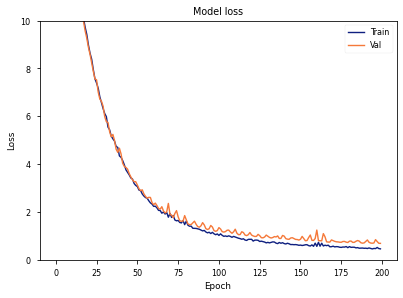

In [67]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=10, bottom=0)
plt.show()

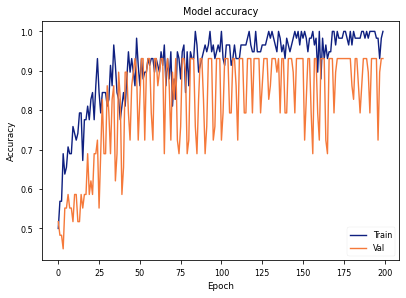

In [68]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

**Compared to Model 2, there is less overfitting. Although not ideal, the validation accuracy is likely due to the small sample size or, since we are using dropout, the model at test time is more robust and leads to higher testing accuracies.**

## Evaluate Model 3 and Print the Results

**Test Accuracy**

In [69]:
model_3.evaluate(X_test, y_testdm)[1]

1/1 [==============================] - 0s 14ms/step - loss: 0.5021 - accuracy: 0.9655


0.9655172228813171

**The test accuracy is good considering we only trained with 58 records.**

In [70]:
#Visualize Feature Importance in table format
X_columns = X_train.columns.tolist()
model_FI_scores = VIANN.varScores.tolist()

model_FI = pd.DataFrame()
model_FI['Variable'] = X_columns
model_FI['Scores'] = model_FI_scores
model_FI.sort_values(by=['Scores'], inplace=True, ascending=True)

model_FI

,Variable,Scores
3,Si_clr,0.000000
13,Eu_clr,0.036143
21,Ta_clr,0.046740
20,Lu_clr,0.048092
4,Ca_clr,0.051290
2,Al_clr,0.057355
15,Tb_clr,0.062741
19,Yb_clr,0.075056
1,Mg_clr,0.078251
7,Mn_clr,0.086445


In [71]:
#Link Features to VIANN scores and export to csv
model_FI_array = np.vstack((X_train.columns, VIANN.varScores))
pd.DataFrame(model_FI_array).to_csv("EG_model_FI.csv", index=None)
model_FI_array

array([['Na_clr', 'Mg_clr', 'Al_clr', 'Si_clr', 'Ca_clr', 'Sc_clr',
        'Ti_clr', 'Mn_clr', 'Sr_clr', 'Y_clr', 'Zr_clr', 'Ba_clr',
        'Nd_clr', 'Eu_clr', 'Gd_clr', 'Tb_clr', 'Dy_clr', 'Ho_clr',
        'Er_clr', 'Yb_clr', 'Lu_clr', 'Ta_clr'],
       [0.11736445873975754, 0.07825081795454025, 0.057354602962732315,
        0.0, 0.051290109753608704, 0.770111083984375,
        0.08978994935750961, 0.08644481003284454, 0.16813521087169647,
        1.0, 0.44626128673553467, 0.10181386023759842,
        0.12553824484348297, 0.03614287078380585, 0.09799166023731232,
        0.06274112313985825, 0.12866008281707764, 0.09541569650173187,
        0.11354507505893707, 0.07505569607019424, 0.04809179529547691,
        0.046740032732486725]], dtype=object)

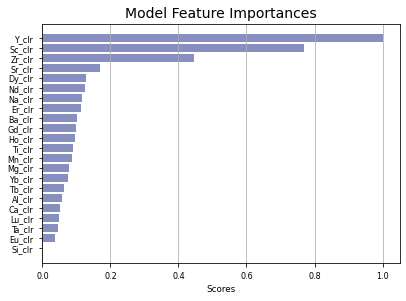

In [72]:
# Plot the feature importances of the model
fig, ax = plt.subplots()

ax.barh(model_FI['Variable'], model_FI['Scores'], align="center", alpha=0.5)
ax.set_xlabel('Scores')
ax.set_yticks(model_FI['Variable'])
ax.xaxis.grid(True)
ax.set_title("EG Model 3 Feature Importances", fontsize='14')

# Save the figure and show
plt.savefig('EG_model_FI_barplot.png')
plt.show()

**Compute the probabilities and predictions on the test set.**

In [73]:
predictions =  model_3.predict_classes(X_test)
probabilities = model_3.predict(X_test)

G:\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [74]:
predictions2 = pd.DataFrame(data = predictions,index = X_test.index.copy())
predictions2.columns = ['predict_class']
probabilities2 = pd.DataFrame(data = probabilities,index = X_test.index.copy())
probabilities2.columns = ['prob_no', 'prob_yes']
probabilities2.head(5)

,prob_no,prob_yes
20,0.006423,0.993679
45,0.005037,0.995050
103,0.994726,0.005055
10,0.001125,0.998903
3,0.016617,0.983614


In [75]:
EG_testresults = pd.concat([X_test,y_test,predictions2,probabilities2],axis=1)
EG_testresults.to_csv("EG_model3results_short.csv")
EG_testresults.head(5)

,Na_clr,Mg_clr,Al_clr,Si_clr,Ca_clr,Sc_clr,Ti_clr,Mn_clr,Sr_clr,Y_clr,...,Dy_clr,Ho_clr,Er_clr,Yb_clr,Lu_clr,Ta_clr,Diamond_High,predict_class,prob_no,prob_yes
20,2.987337,7.836144,8.350412,9.360468,7.564681,0.367011,4.852001,4.283706,-3.898226,-0.232336,...,-2.207348,-3.482711,-2.357781,-2.052400,-3.960747,-6.701587,yes,1,0.006423,0.993679
45,2.762111,6.676870,7.224950,8.139179,6.976534,0.163753,3.754397,3.877610,-0.094745,-0.434331,...,-1.921951,-3.355748,-2.291969,-2.184186,-4.110195,-6.011154,yes,1,0.005037,0.995050
103,4.953507,7.951012,7.976612,9.055139,7.285973,1.931952,3.301046,4.943127,-0.707635,-0.827740,...,-2.700065,-4.106979,-2.830686,-2.315220,-3.929298,-8.205232,no,0,0.994726,0.005055
10,4.180842,8.302575,8.798142,9.720833,8.822607,0.012604,4.542149,3.988523,-2.595240,-1.141505,...,-2.630747,-4.341538,-3.553080,-3.871534,-5.950975,-5.440150,yes,1,0.001125,0.998903
3,2.863625,7.820708,8.395218,9.316535,8.164154,0.927217,4.332200,4.119983,-1.767456,-1.100420,...,-2.866069,-4.550408,-3.281896,-3.329906,-4.955873,-6.054485,yes,1,0.016617,0.983614


In [76]:
EG_testresults2 = predictions2.join([probabilities2, df])
EG_testresults2.to_csv("EG_model3results_all.csv")
EG_testresults2.head(5)

,predict_class,prob_no,prob_yes,Sample,Mineral,Pipe,Diamond_High,Craton,Na,Mg,...,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22
20,1.0,0.006423,0.993679,Ap22B10,E,KOALA,yes,Slave,322.757144,41180,...,0.028758,0.007678,0.020091,-0.023130,0.005453,-0.007001,-0.000077,-0.013302,-0.005564,3.900000e-16
45,1.0,0.005037,0.995050,Ap24C09,E,PANDA,yes,Slave,839.700000,42100,...,-0.037954,-0.019974,-0.009755,0.021355,0.000234,0.000199,0.001543,0.001162,0.006159,-4.300000e-16
103,0.0,0.994726,0.005055,Ap27H06,E,ZERO,no,Kaapvaal,3099.000000,62090,...,0.015567,-0.076465,-0.032694,0.001583,-0.015262,-0.013493,0.011280,-0.009177,-0.003595,-7.810000e-16
10,1.0,0.001125,0.998903,Ap22D20,E,BEARTOOTH,yes,Slave,753.900000,46490,...,-0.041265,-0.007368,-0.007938,-0.010637,-0.017485,-0.007234,0.004900,-0.002115,0.004054,-2.500000e-16
3,1.0,0.016617,0.983614,Ap22D13,E,BEARTOOTH,yes,Slave,298.638752,42460,...,0.064989,-0.015433,-0.021896,0.003115,-0.006966,-0.022694,-0.012266,0.012161,0.008531,-5.550000e-17


# Save the Model

**Serialize model to JSON for later use.**

In [77]:
# save model and architecture to single file
model_3.save("model_3_EG.h5")
print("Saved model to disk")

Saved model to disk


# Run Model on More Data

**Load JSON and create the model**

In [78]:
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model

# load model
model_3_EG = load_model('model_3_EG.h5')
print("Loaded model from disk")

Loaded model from disk


# Prediction with New Data with Unknown Classifier (y)

**Using X_test data and predicting y. Make sure the X data is scaled the same as the data used in the model.**
**Predict y.**

In [79]:
y_new = model_3_EG.predict(X_test)
y_new

array([[6.4225495e-03, 9.9367887e-01],
       [5.0368905e-03, 9.9504960e-01],
       [9.9472570e-01, 5.0554276e-03],
       [1.1252463e-03, 9.9890256e-01],
       [1.6617298e-02, 9.8361421e-01],
       [5.4596364e-03, 9.9463171e-01],
       [5.7289779e-01, 4.2585808e-01],
       [1.7442703e-03, 9.9829423e-01],
       [2.7317107e-02, 9.7307014e-01],
       [9.3716770e-01, 6.1743408e-02],
       [9.8838711e-01, 1.1215359e-02],
       [1.3822839e-01, 8.6261719e-01],
       [9.9790072e-01, 1.9936860e-03],
       [8.5481107e-03, 9.9158043e-01],
       [5.1274270e-02, 9.4932950e-01],
       [3.3041263e-01, 6.6993582e-01],
       [9.9594086e-01, 3.8807690e-03],
       [9.9069107e-01, 8.9755654e-03],
       [9.8646402e-01, 1.3116568e-02],
       [9.9997872e-01, 1.9407154e-05],
       [2.8764236e-01, 7.1274453e-01],
       [1.4507005e-01, 8.5577893e-01],
       [9.9996138e-01, 3.5487828e-05],
       [8.5749924e-03, 9.9155271e-01],
       [2.2148699e-02, 9.7814214e-01],
       [9.4666922e-01, 5.

**Print the input data and the predicted values. Replace X_test with the new data with an unknown classifier.**

In [80]:
predictions_new =  model_3_EG.predict_classes(X_test)
probabilities_new = model_3_EG.predict(X_test)

G:\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [81]:
predictions_new2 = pd.DataFrame(data = predictions_new,index = X_test.index.copy())
predictions_new2.columns = ['predict_class']
probabilities_new2 = pd.DataFrame(data = probabilities_new,index = X_test.index.copy())
probabilities_new2.columns = ['prob_no', 'prob_yes']
probabilities_new2.head(5)

,prob_no,prob_yes
20,0.006423,0.993679
45,0.005037,0.995050
103,0.994726,0.005055
10,0.001125,0.998903
3,0.016617,0.983614


**Generate accuracy prediction as dataframe object for importing into other programs.**

In [82]:
EG_newresults = predictions_new2.join([probabilities_new2, df])
EG_newresults.to_csv("EG_newresults.csv")
EG_newresults.head(5)

,predict_class,prob_no,prob_yes,Sample,Mineral,Pipe,Diamond_High,Craton,Na,Mg,...,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22
20,1.0,0.006423,0.993679,Ap22B10,E,KOALA,yes,Slave,322.757144,41180,...,0.028758,0.007678,0.020091,-0.023130,0.005453,-0.007001,-0.000077,-0.013302,-0.005564,3.900000e-16
45,1.0,0.005037,0.995050,Ap24C09,E,PANDA,yes,Slave,839.700000,42100,...,-0.037954,-0.019974,-0.009755,0.021355,0.000234,0.000199,0.001543,0.001162,0.006159,-4.300000e-16
103,0.0,0.994726,0.005055,Ap27H06,E,ZERO,no,Kaapvaal,3099.000000,62090,...,0.015567,-0.076465,-0.032694,0.001583,-0.015262,-0.013493,0.011280,-0.009177,-0.003595,-7.810000e-16
10,1.0,0.001125,0.998903,Ap22D20,E,BEARTOOTH,yes,Slave,753.900000,46490,...,-0.041265,-0.007368,-0.007938,-0.010637,-0.017485,-0.007234,0.004900,-0.002115,0.004054,-2.500000e-16
3,1.0,0.016617,0.983614,Ap22D13,E,BEARTOOTH,yes,Slave,298.638752,42460,...,0.064989,-0.015433,-0.021896,0.003115,-0.006966,-0.022694,-0.012266,0.012161,0.008531,-5.550000e-17


## Re-Split Data and Verify Results

In [83]:
sss2 = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=333)
sss2.get_n_splits(X, y['Diamond_High'])

1

In [84]:
print(sss)

StratifiedShuffleSplit(n_splits=1, random_state=333, test_size=0.5,
            train_size=None)


In [85]:
for train_index, test_index in sss2.split(X, y):
     print("TRAIN:", train_index, "TESTVAL:", test_index)
     X_train2, X_testval2 = X.iloc[train_index], X.iloc[test_index]
     y_train2, y_testval2 = y.iloc[train_index], y.iloc[test_index]

TRAIN: [ 62  56  72   2 113  59  18  53 100  32  21  79  43   6 112  80  75  89
  54  33   0  47  64  60  44  38  58  30  99  73 115  68  63  97  55  31
  14  94  24  17  82  42  74  13  76  23  85  28 111  91  40  69  48  88
 101  29  37   5] TESTVAL: [ 26 103  90  19  86  15  96  98  39  35  78  41   3   9   7  70  16 109
   4  36  50   1  93  57  49 102  92  34  22   8 114 107  84  95  77  52
  67  25  61  45  10 104  20 106  66 108  83  11  51  71  87 105  27  81
 110  46  65  12]


**Split testval into test and validation sets**

In [86]:
for train_index, test_index in sss.split(X_testval2, y_testval2):
     print("TEST:", train_index, "VAL:", test_index)
     X_test2, X_val2 = X_testval2.iloc[train_index], X_testval2.iloc[test_index]
     y_test2, y_val2 = y_testval2.iloc[train_index], y_testval2.iloc[test_index]

TEST: [42 39  1 40 12 23  4 20 29  2 45 57 38 16 19 52 44 41  7 15 53  9 34 55
 28 26 30 49 47] VAL: [17 37 18 22 43 14  5  0 46 10  8 27 32 51  3 35 13 56 11 48 31 24 21 25
 33 54 36  6 50]


In [87]:
y_test2.head(5)

,Diamond_High
20,yes
45,yes
103,no
10,yes
3,yes


In [88]:
y_val2.head(5)

,Diamond_High
109,no
25,yes
4,yes
93,no
106,no


**Next encode the categorical variablesfor diamond content, yes and no, using one hot vector multilabel. The data is split first then one hot encoded since the split function cannot handle more than one Y column.**

In [89]:
y_traindm2 = pd.get_dummies(y_train2['Diamond_High'], prefix = 'diamond')
y_traindm2.head(5)

,diamond_no,diamond_yes
62,1,0
56,0,1
72,1,0
2,0,1
113,1,0


In [90]:
y_valdm2 = pd.get_dummies(y_val2['Diamond_High'], prefix = 'diamond')
y_valdm2.head(5)

,diamond_no,diamond_yes
109,1,0
25,0,1
4,0,1
93,1,0
106,1,0


In [91]:
y_testdm2 = pd.get_dummies(y_test2['Diamond_High'], prefix = 'diamond')
y_testdm2.head(5)

,diamond_no,diamond_yes
20,0,1
45,0,1
103,1,0
10,0,1
3,0,1


In [92]:
X_val2.head(5)

,Na_clr,Mg_clr,Al_clr,Si_clr,Ca_clr,Sc_clr,Ti_clr,Mn_clr,Sr_clr,Y_clr,...,Nd_clr,Eu_clr,Gd_clr,Tb_clr,Dy_clr,Ho_clr,Er_clr,Yb_clr,Lu_clr,Ta_clr
109,2.274170,7.953645,7.896628,8.882147,7.104743,1.171477,3.398866,4.518214,-1.471593,-0.567965,...,-3.156668,-3.963144,-2.607309,-4.137498,-2.699018,-3.375358,-2.591964,-2.781417,-4.656291,-8.127328
25,3.155656,6.792351,7.728522,8.689833,6.902087,0.502686,1.954843,4.577170,-5.220288,0.864700,...,-3.170494,-3.619187,-1.753894,-3.162831,-1.095871,-2.443317,-1.272989,-0.971561,-2.770170,-9.189917
4,3.959154,7.582180,8.231887,9.187019,7.661038,0.638427,4.668046,4.501715,-3.854135,0.369409,...,-3.959495,-4.451972,-3.482571,-4.077278,-1.725903,-2.958047,-1.790441,-1.693689,-3.630991,-7.543014
93,5.281962,8.589268,8.500139,9.497085,7.285629,1.036535,4.364274,4.954873,-3.257831,-0.512393,...,-3.849196,-4.064307,-3.006517,-4.392811,-2.407986,-3.915887,-2.573653,-2.355929,-4.287451,-9.036028
106,5.406928,8.407291,8.451694,9.526350,7.619120,1.057154,3.743903,4.910194,-0.791487,-1.331609,...,-3.416471,-4.472523,-3.811125,-5.299202,-3.202061,-4.537062,-3.661593,-3.274820,-5.047887,-7.245112


In [93]:
print(X_train2.shape, X_val2.shape, X_test2.shape)
print(y_traindm2.shape, y_valdm2.shape, y_testdm2.shape)

(58, 22) (29, 22) (29, 22)
(58, 2) (29, 2) (29, 2)


## Evaluate Model 3 with Re-Split Data and Print the Results

**Test Accuracy**

In [94]:
VIANN = VarImpVIANN(verbose=1)
model_3_EG.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_4 = model_3_EG.fit(X_train2, y_traindm2,
          batch_size=58, epochs=200,
          validation_data=(X_val2, y_valdm2), callbacks=[VIANN])

VIANN version 1.0 (Wellford + Mean) update per epoch
Epoch 1/200
1/1 [==============================] - 1s 789ms/step - loss: 0.4579 - accuracy: 0.9828 - val_loss: 4.2855 - val_accuracy: 0.4828
Epoch 2/200
1/1 [==============================] - 0s 52ms/step - loss: 2.8884 - accuracy: 0.6207 - val_loss: 1.5649 - val_accuracy: 0.6897
Epoch 3/200
1/1 [==============================] - 0s 43ms/step - loss: 0.8429 - accuracy: 0.7931 - val_loss: 1.1558 - val_accuracy: 0.5862
Epoch 4/200
1/1 [==============================] - 0s 42ms/step - loss: 1.1592 - accuracy: 0.6379 - val_loss: 1.1780 - val_accuracy: 0.5862
Epoch 5/200
1/1 [==============================] - 0s 42ms/step - loss: 1.0878 - accuracy: 0.6897 - val_loss: 0.8419 - val_accuracy: 0.7586
Epoch 6/200
1/1 [==============================] - 0s 45ms/step - loss: 0.7949 - accuracy: 0.7931 - val_loss: 0.6793 - val_accuracy: 0.9310
Epoch 7/200
1/1 [==============================] - 0s 43ms/step - loss: 0.5637 - accuracy: 0.9483 - val_lo

Epoch 59/200
1/1 [==============================] - 0s 43ms/step - loss: 0.3622 - accuracy: 1.0000 - val_loss: 0.6171 - val_accuracy: 0.9310
Epoch 60/200
1/1 [==============================] - 0s 41ms/step - loss: 0.3676 - accuracy: 1.0000 - val_loss: 0.6196 - val_accuracy: 0.9310
Epoch 61/200
1/1 [==============================] - 0s 43ms/step - loss: 0.3812 - accuracy: 1.0000 - val_loss: 0.6335 - val_accuracy: 0.9310
Epoch 62/200
1/1 [==============================] - 0s 43ms/step - loss: 0.3700 - accuracy: 1.0000 - val_loss: 0.6390 - val_accuracy: 0.9310
Epoch 63/200
1/1 [==============================] - 0s 42ms/step - loss: 0.3790 - accuracy: 1.0000 - val_loss: 0.6273 - val_accuracy: 0.9310
Epoch 64/200
1/1 [==============================] - 0s 43ms/step - loss: 0.3786 - accuracy: 1.0000 - val_loss: 0.6227 - val_accuracy: 0.9310
Epoch 65/200
1/1 [==============================] - 0s 42ms/step - loss: 0.3693 - accuracy: 1.0000 - val_loss: 0.6184 - val_accuracy: 0.9310
Epoch 66/200


Epoch 117/200
1/1 [==============================] - 0s 43ms/step - loss: 0.3211 - accuracy: 1.0000 - val_loss: 0.5550 - val_accuracy: 0.9310
Epoch 118/200
1/1 [==============================] - 0s 45ms/step - loss: 0.3221 - accuracy: 1.0000 - val_loss: 0.5507 - val_accuracy: 0.9310
Epoch 119/200
1/1 [==============================] - 0s 43ms/step - loss: 0.3168 - accuracy: 1.0000 - val_loss: 0.5663 - val_accuracy: 0.9310
Epoch 120/200
1/1 [==============================] - 0s 43ms/step - loss: 0.3144 - accuracy: 1.0000 - val_loss: 0.5902 - val_accuracy: 0.9310
Epoch 121/200
1/1 [==============================] - 0s 43ms/step - loss: 0.3164 - accuracy: 1.0000 - val_loss: 0.5864 - val_accuracy: 0.9310
Epoch 122/200
1/1 [==============================] - 0s 45ms/step - loss: 0.3191 - accuracy: 1.0000 - val_loss: 0.5697 - val_accuracy: 0.9310
Epoch 123/200
1/1 [==============================] - 0s 46ms/step - loss: 0.3108 - accuracy: 1.0000 - val_loss: 0.5744 - val_accuracy: 0.9310
Epoch 

Epoch 175/200
1/1 [==============================] - 0s 42ms/step - loss: 0.3167 - accuracy: 0.9655 - val_loss: 0.5515 - val_accuracy: 0.9310
Epoch 176/200
1/1 [==============================] - 0s 41ms/step - loss: 0.3258 - accuracy: 0.9828 - val_loss: 0.5537 - val_accuracy: 0.9310
Epoch 177/200
1/1 [==============================] - 0s 43ms/step - loss: 0.3243 - accuracy: 0.9828 - val_loss: 0.7190 - val_accuracy: 0.7241
Epoch 178/200
1/1 [==============================] - 0s 43ms/step - loss: 0.3175 - accuracy: 0.9828 - val_loss: 0.6525 - val_accuracy: 0.8276
Epoch 179/200
1/1 [==============================] - 0s 41ms/step - loss: 0.2936 - accuracy: 1.0000 - val_loss: 0.5491 - val_accuracy: 0.9310
Epoch 180/200
1/1 [==============================] - 0s 43ms/step - loss: 0.2933 - accuracy: 1.0000 - val_loss: 0.5442 - val_accuracy: 0.9310
Epoch 181/200
1/1 [==============================] - 0s 43ms/step - loss: 0.3119 - accuracy: 1.0000 - val_loss: 0.5840 - val_accuracy: 0.9310
Epoch 

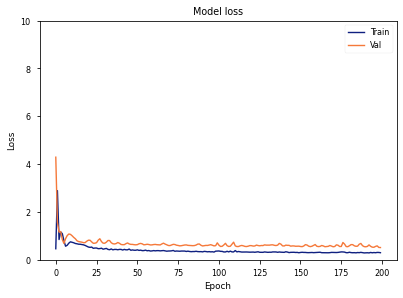

In [95]:
plt.plot(hist_4.history['loss'])
plt.plot(hist_4.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=10, bottom=0)
plt.show()

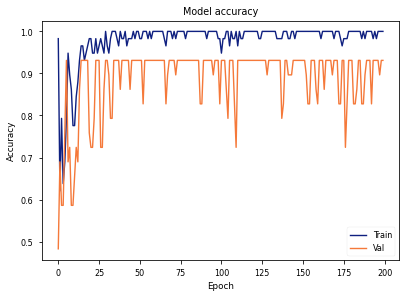

In [96]:
plt.plot(hist_4.history['accuracy'])
plt.plot(hist_4.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [97]:
model_3_EG.evaluate(X_test2, y_testdm2)[1]

1/1 [==============================] - 0s 14ms/step - loss: 0.3306 - accuracy: 0.9655


0.9655172228813171

**Re-split model loss and accuracy are consistent with previous results.**

## Re-Split Data and Verify Results Again (Split number 3)

**Shuffle Split**

In [98]:
sss3 = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=333)
sss3.get_n_splits(X, y['Diamond_High'])

1

In [99]:
print(sss3)

StratifiedShuffleSplit(n_splits=1, random_state=333, test_size=0.5,
            train_size=None)


In [100]:
for train_index, test_index in sss3.split(X, y):
     print("TRAIN:", train_index, "TESTVAL:", test_index)
     X_train3, X_testval3 = X.iloc[train_index], X.iloc[test_index]
     y_train3, y_testval3 = y.iloc[train_index], y.iloc[test_index]

TRAIN: [ 62  56  72   2 113  59  18  53 100  32  21  79  43   6 112  80  75  89
  54  33   0  47  64  60  44  38  58  30  99  73 115  68  63  97  55  31
  14  94  24  17  82  42  74  13  76  23  85  28 111  91  40  69  48  88
 101  29  37   5] TESTVAL: [ 26 103  90  19  86  15  96  98  39  35  78  41   3   9   7  70  16 109
   4  36  50   1  93  57  49 102  92  34  22   8 114 107  84  95  77  52
  67  25  61  45  10 104  20 106  66 108  83  11  51  71  87 105  27  81
 110  46  65  12]


**Split testval into test and validation sets**

In [101]:
for train_index, test_index in sss.split(X_testval3, y_testval3):
     print("TEST:", train_index, "VAL:", test_index)
     X_test3, X_val3 = X_testval3.iloc[train_index], X_testval3.iloc[test_index]
     y_test3, y_val3 = y_testval3.iloc[train_index], y_testval3.iloc[test_index]

TEST: [42 39  1 40 12 23  4 20 29  2 45 57 38 16 19 52 44 41  7 15 53  9 34 55
 28 26 30 49 47] VAL: [17 37 18 22 43 14  5  0 46 10  8 27 32 51  3 35 13 56 11 48 31 24 21 25
 33 54 36  6 50]


**Next encode the categorical variablesfor diamond content, yes and no, using one hot vector multilabel. The data is split first then one hot encoded since the split function cannot handle more than one Y column.**

In [102]:
y_traindm3 = pd.get_dummies(y_train3['Diamond_High'], prefix = 'diamond')
y_traindm3.head(5)

,diamond_no,diamond_yes
62,1,0
56,0,1
72,1,0
2,0,1
113,1,0


In [103]:
X_train3.head(5)

,Na_clr,Mg_clr,Al_clr,Si_clr,Ca_clr,Sc_clr,Ti_clr,Mn_clr,Sr_clr,Y_clr,...,Nd_clr,Eu_clr,Gd_clr,Tb_clr,Dy_clr,Ho_clr,Er_clr,Yb_clr,Lu_clr,Ta_clr
62,2.573494,7.446205,7.985973,8.986173,7.877644,0.887044,3.305657,4.666753,0.204905,-2.129035,...,-2.716822,-3.423392,-1.886816,-3.320738,-1.467876,-2.771630,-1.922322,-1.751106,-3.522765,-8.418463
56,3.712454,7.285341,7.792426,8.752306,7.845923,0.781572,4.650940,4.189808,-0.634774,-1.299429,...,-3.133260,-4.347704,-3.240358,-4.727194,-2.504651,-3.842155,-2.717432,-2.447956,-4.374372,-6.039380
72,3.456842,8.653091,8.844435,9.836221,1.503258,4.628216,1.990932,5.121911,-0.229632,-0.186356,...,-2.600859,-3.376245,-2.500776,-3.935860,-2.018938,-3.497605,-2.377716,-2.420733,-4.366643,-6.931593
2,3.839299,8.474785,8.725201,9.688373,8.107743,1.039733,4.717389,4.451784,-3.645976,-0.881484,...,-2.817283,-4.515013,-3.090979,-4.595056,-2.890308,-4.246749,-3.188143,-3.342293,-5.288203,-5.981351
113,2.636879,8.279644,8.163780,9.250662,7.332864,1.543509,3.462128,5.046141,-3.911456,-0.325625,...,-3.367840,-4.093777,-2.296478,-3.998467,-2.022704,-3.710785,-2.567721,-2.407378,-3.884057,-8.637125


In [104]:
y_testdm3 = pd.get_dummies(y_test3['Diamond_High'], prefix = 'diamond')
y_testdm3.head(5)

,diamond_no,diamond_yes
20,0,1
45,0,1
103,1,0
10,0,1
3,0,1


In [105]:
X_test3.head(5)

,Na_clr,Mg_clr,Al_clr,Si_clr,Ca_clr,Sc_clr,Ti_clr,Mn_clr,Sr_clr,Y_clr,...,Nd_clr,Eu_clr,Gd_clr,Tb_clr,Dy_clr,Ho_clr,Er_clr,Yb_clr,Lu_clr,Ta_clr
20,2.987337,7.836144,8.350412,9.360468,7.564681,0.367011,4.852001,4.283706,-3.898226,-0.232336,...,-3.482711,-4.450295,-3.283860,-4.622145,-2.207348,-3.482711,-2.357781,-2.052400,-3.960747,-6.701587
45,2.762111,6.676870,7.224950,8.139179,6.976534,0.163753,3.754397,3.877610,-0.094745,-0.434331,...,-3.034840,-4.121756,-2.538233,-3.941374,-1.921951,-3.355748,-2.291969,-2.184186,-4.110195,-6.011154
103,4.953507,7.951012,7.976612,9.055139,7.285973,1.931952,3.301046,4.943127,-0.707635,-0.827740,...,-3.840350,-5.292603,-4.224762,-5.125549,-2.700065,-4.106979,-2.830686,-2.315220,-3.929298,-8.205232
10,4.180842,8.302575,8.798142,9.720833,8.822607,0.012604,4.542149,3.988523,-2.595240,-1.141505,...,-2.189775,-3.717383,-2.786908,-4.276999,-2.630747,-4.341538,-3.553080,-3.871534,-5.950975,-5.440150
3,2.863625,7.820708,8.395218,9.316535,8.164154,0.927217,4.332200,4.119983,-1.767456,-1.100420,...,-2.687189,-4.144943,-3.178100,-4.875830,-2.866069,-4.550408,-3.281896,-3.329906,-4.955873,-6.054485


In [106]:
y_valdm3 = pd.get_dummies(y_val3['Diamond_High'], prefix = 'diamond')
y_valdm3.head(5)

,diamond_no,diamond_yes
109,1,0
25,0,1
4,0,1
93,1,0
106,1,0


In [107]:
X_val3.head(5)

,Na_clr,Mg_clr,Al_clr,Si_clr,Ca_clr,Sc_clr,Ti_clr,Mn_clr,Sr_clr,Y_clr,...,Nd_clr,Eu_clr,Gd_clr,Tb_clr,Dy_clr,Ho_clr,Er_clr,Yb_clr,Lu_clr,Ta_clr
109,2.274170,7.953645,7.896628,8.882147,7.104743,1.171477,3.398866,4.518214,-1.471593,-0.567965,...,-3.156668,-3.963144,-2.607309,-4.137498,-2.699018,-3.375358,-2.591964,-2.781417,-4.656291,-8.127328
25,3.155656,6.792351,7.728522,8.689833,6.902087,0.502686,1.954843,4.577170,-5.220288,0.864700,...,-3.170494,-3.619187,-1.753894,-3.162831,-1.095871,-2.443317,-1.272989,-0.971561,-2.770170,-9.189917
4,3.959154,7.582180,8.231887,9.187019,7.661038,0.638427,4.668046,4.501715,-3.854135,0.369409,...,-3.959495,-4.451972,-3.482571,-4.077278,-1.725903,-2.958047,-1.790441,-1.693689,-3.630991,-7.543014
93,5.281962,8.589268,8.500139,9.497085,7.285629,1.036535,4.364274,4.954873,-3.257831,-0.512393,...,-3.849196,-4.064307,-3.006517,-4.392811,-2.407986,-3.915887,-2.573653,-2.355929,-4.287451,-9.036028
106,5.406928,8.407291,8.451694,9.526350,7.619120,1.057154,3.743903,4.910194,-0.791487,-1.331609,...,-3.416471,-4.472523,-3.811125,-5.299202,-3.202061,-4.537062,-3.661593,-3.274820,-5.047887,-7.245112


# Building and Training the Neural Network with Re-Split Data

In [108]:
VIANN = VarImpVIANN(verbose=1)
model_3_EG.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_5 = model_3_EG.fit(X_train3, y_traindm3,
          batch_size=58, epochs=200,
          validation_data=(X_val3, y_valdm3), callbacks=[VIANN])

VIANN version 1.0 (Wellford + Mean) update per epoch
Epoch 1/200
1/1 [==============================] - 1s 980ms/step - loss: 0.2846 - accuracy: 1.0000 - val_loss: 3.7421 - val_accuracy: 0.4828
Epoch 2/200
1/1 [==============================] - 0s 43ms/step - loss: 2.3019 - accuracy: 0.6207 - val_loss: 1.2580 - val_accuracy: 0.7241
Epoch 3/200
1/1 [==============================] - 0s 44ms/step - loss: 0.5805 - accuracy: 0.8103 - val_loss: 1.0530 - val_accuracy: 0.5862
Epoch 4/200
1/1 [==============================] - 0s 42ms/step - loss: 1.0139 - accuracy: 0.6724 - val_loss: 1.1020 - val_accuracy: 0.5862
Epoch 5/200
1/1 [==============================] - 0s 42ms/step - loss: 1.1162 - accuracy: 0.6379 - val_loss: 0.6464 - val_accuracy: 0.8276
Epoch 6/200
1/1 [==============================] - 0s 45ms/step - loss: 0.6086 - accuracy: 0.7759 - val_loss: 0.5428 - val_accuracy: 0.9310
Epoch 7/200
1/1 [==============================] - 0s 42ms/step - loss: 0.3325 - accuracy: 1.0000 - val_lo

Epoch 59/200
1/1 [==============================] - 0s 41ms/step - loss: 0.2999 - accuracy: 1.0000 - val_loss: 0.5377 - val_accuracy: 0.9310
Epoch 60/200
1/1 [==============================] - 0s 44ms/step - loss: 0.2737 - accuracy: 1.0000 - val_loss: 0.5285 - val_accuracy: 0.9310
Epoch 61/200
1/1 [==============================] - 0s 42ms/step - loss: 0.2697 - accuracy: 1.0000 - val_loss: 0.5206 - val_accuracy: 0.9310
Epoch 62/200
1/1 [==============================] - 0s 41ms/step - loss: 0.2707 - accuracy: 1.0000 - val_loss: 0.5223 - val_accuracy: 0.9310
Epoch 63/200
1/1 [==============================] - 0s 43ms/step - loss: 0.2729 - accuracy: 1.0000 - val_loss: 0.5276 - val_accuracy: 0.9310
Epoch 64/200
1/1 [==============================] - 0s 42ms/step - loss: 0.2825 - accuracy: 1.0000 - val_loss: 0.5231 - val_accuracy: 0.9310
Epoch 65/200
1/1 [==============================] - 0s 42ms/step - loss: 0.2785 - accuracy: 1.0000 - val_loss: 0.5274 - val_accuracy: 0.9310
Epoch 66/200


Epoch 117/200
1/1 [==============================] - 0s 43ms/step - loss: 0.2601 - accuracy: 1.0000 - val_loss: 0.5375 - val_accuracy: 0.9310
Epoch 118/200
1/1 [==============================] - 0s 42ms/step - loss: 0.2580 - accuracy: 1.0000 - val_loss: 0.5554 - val_accuracy: 0.9310
Epoch 119/200
1/1 [==============================] - 0s 43ms/step - loss: 0.2683 - accuracy: 1.0000 - val_loss: 0.5434 - val_accuracy: 0.9310
Epoch 120/200
1/1 [==============================] - 0s 42ms/step - loss: 0.2690 - accuracy: 1.0000 - val_loss: 0.5076 - val_accuracy: 0.9310
Epoch 121/200
1/1 [==============================] - 0s 41ms/step - loss: 0.2594 - accuracy: 1.0000 - val_loss: 0.4972 - val_accuracy: 0.9310
Epoch 122/200
1/1 [==============================] - 0s 44ms/step - loss: 0.2643 - accuracy: 1.0000 - val_loss: 0.5042 - val_accuracy: 0.9310
Epoch 123/200
1/1 [==============================] - 0s 42ms/step - loss: 0.2556 - accuracy: 1.0000 - val_loss: 0.5382 - val_accuracy: 0.9310
Epoch 

Epoch 175/200
1/1 [==============================] - 0s 42ms/step - loss: 0.2503 - accuracy: 1.0000 - val_loss: 0.5217 - val_accuracy: 0.9310
Epoch 176/200
1/1 [==============================] - 0s 43ms/step - loss: 0.2486 - accuracy: 1.0000 - val_loss: 0.5788 - val_accuracy: 0.8621
Epoch 177/200
1/1 [==============================] - 0s 42ms/step - loss: 0.2718 - accuracy: 1.0000 - val_loss: 0.4941 - val_accuracy: 0.9310
Epoch 178/200
1/1 [==============================] - 0s 42ms/step - loss: 0.2514 - accuracy: 1.0000 - val_loss: 0.4823 - val_accuracy: 0.9310
Epoch 179/200
1/1 [==============================] - 0s 43ms/step - loss: 0.2943 - accuracy: 0.9655 - val_loss: 0.4934 - val_accuracy: 0.9310
Epoch 180/200
1/1 [==============================] - 0s 43ms/step - loss: 0.2478 - accuracy: 1.0000 - val_loss: 0.5874 - val_accuracy: 0.8621
Epoch 181/200
1/1 [==============================] - 0s 44ms/step - loss: 0.2690 - accuracy: 1.0000 - val_loss: 0.6158 - val_accuracy: 0.8621
Epoch 

#### Visualize the loss and accuracy graphs for Split 3.

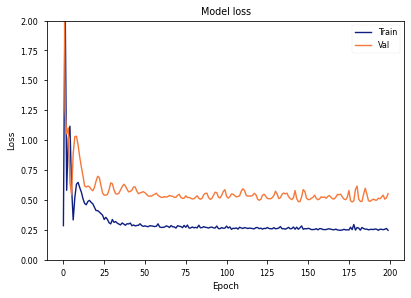

In [109]:
plt.plot(hist_5.history['loss'])
plt.plot(hist_5.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=2, bottom=0)
plt.show()

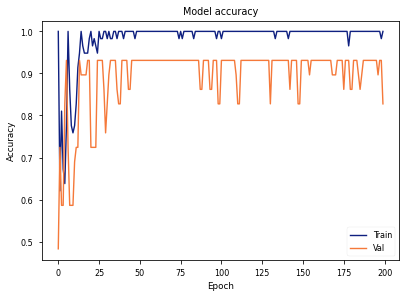

In [110]:
plt.plot(hist_5.history['accuracy'])
plt.plot(hist_5.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

**Test Accuracy**

In [111]:
model_3_EG.evaluate(X_test3, y_testdm3)[1]

1/1 [==============================] - 0s 14ms/step - loss: 0.3368 - accuracy: 0.9310


0.931034505367279

**Re-split model loss and accuracy are consistent with previous results.**

## The End